In [1]:
import os, sys
import pickle
import polars as pl

In [2]:
# Define el ID del experimento que quieres analizar
DATA_ID = 'simulation_testing' 
N_REALIZATIONS = 100

project_path = os.path.abspath(os.path.join(os.getcwd(), '..', '..')) 
results_dir = os.path.join(project_path, 'results', 'experiment_3', DATA_ID)
filename = f'results_exp_3_{DATA_ID}.pkl'
results_path = os.path.join(results_dir, filename)

sys.path.append(project_path)

from src.experiments_utils import plot_experiment_3_results
#from config.config_experiment_3 import N_REALIZATIONS

In [3]:
# -------------------------------------------------------------------------
# CARGAR RESULTADOS
# -------------------------------------------------------------------------
if not os.path.exists(results_path):
    print("❌ Error: El archivo no existe. Revisa el DATA_ID o la ruta.")
else:
    with open(results_path, 'rb') as f:
        results = pickle.load(f)
    print(f"✅ Archivo cargado correctamente. Tipo de objeto: {type(results)}")
    print(f"📊 Número de realizaciones (seeds) capturadas: {len(results)}")

# -------------------------------------------------------------------------
# CONVERSIÓN A DATAFRAME  
# -------------------------------------------------------------------------
rows = []
for seed, metrics in results.items():   
    # Asumimos que todas las métricas tienen las mismas claves (frac_sample_sizes)
    n_splits_arr = metrics['ARI'].keys() 
    frac_sample_size_arr = metrics['ARI'][list(n_splits_arr)[0]].keys()
    
    for n_splits in n_splits_arr:
        for frac in frac_sample_size_arr:        
            row = {
                'random_state': seed,
                'n_splits': n_splits,
                'frac_sample_size': frac,
                'time': metrics['time'].get(n_splits).get(frac),
                'adj_accuracy': metrics['adj_accuracy'].get(n_splits).get(frac),
                'ARI': metrics['ARI'].get(n_splits).get(frac)
            }
            rows.append(row)

df = pl.DataFrame(rows)

✅ Archivo cargado correctamente. Tipo de objeto: <class 'dict'>
📊 Número de realizaciones (seeds) capturadas: 5


In [4]:
df

random_state,n_splits,frac_sample_size,time,adj_accuracy,ARI
i64,i64,f64,f64,f64,f64
428,5,0.1,2.376677,0.8768,0.704409
428,5,0.2,2.268323,0.8818,0.715299
428,5,0.3,2.42906,0.8794,0.710692
428,5,0.4,2.617259,0.8806,0.713202
428,10,0.1,3.955083,0.8536,0.652442
…,…,…,…,…,…
2183,20,0.4,6.799716,0.879,0.709235
2183,40,0.1,11.892926,0.7238,0.410916
2183,40,0.2,11.454753,0.83,0.600262


In [5]:
df.filter(pl.col('random_state') == 428)

random_state,n_splits,frac_sample_size,time,adj_accuracy,ARI
i64,i64,f64,f64,f64,f64
428,5,0.1,2.376677,0.8768,0.704409
428,5,0.2,2.268323,0.8818,0.715299
428,5,0.3,2.42906,0.8794,0.710692
428,5,0.4,2.617259,0.8806,0.713202
428,10,0.1,3.955083,0.8536,0.652442
…,…,…,…,…,…
428,20,0.4,6.288555,0.88,0.710942
428,40,0.1,11.570403,0.7534,0.450699
428,40,0.2,11.718402,0.8314,0.60365


In [6]:
df_avg = (
    df.group_by(['n_splits', 'frac_sample_size'])
    .agg(pl.mean(['ARI', 'adj_accuracy', 'time']))
    .sort(['n_splits', 'frac_sample_size'])
)

df_avg

n_splits,frac_sample_size,ARI,adj_accuracy,time
i64,f64,f64,f64,f64
5,0.1,0.687921,0.8688,2.637373
5,0.2,0.687177,0.86928,2.440515
5,0.3,0.708422,0.8786,2.444887
5,0.4,0.696187,0.87204,2.473833
10,0.1,0.676639,0.86476,3.88973
…,…,…,…,…
20,0.4,0.70949,0.87928,6.430076
40,0.1,0.414311,0.72804,11.787549
40,0.2,0.597705,0.82808,11.551223


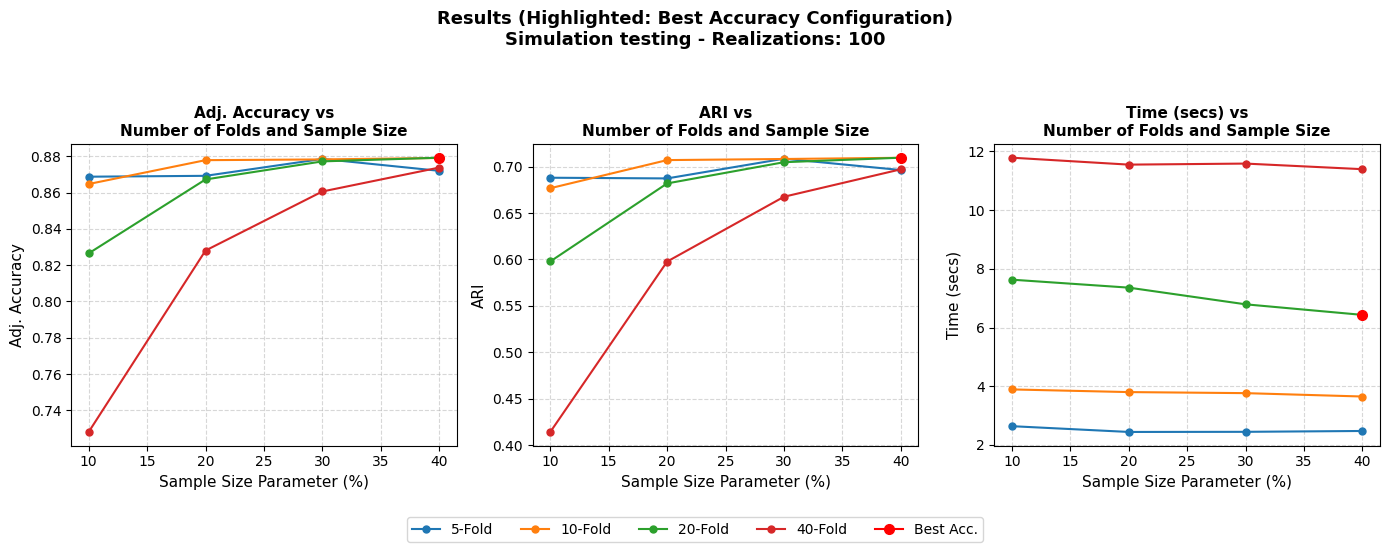

In [7]:
plot_filename = f'plot_results_exp_multifold_{DATA_ID}.png'
save_path = os.path.join(results_dir, plot_filename)

# LLAMADA A LA FUNCIÓN
plot_experiment_3_results(
    df=df_avg,                  
    data_name=DATA_ID,          
    num_realizations=100,       
    save_path=save_path
)